In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as rcParams

In [7]:
dataset = pd.read_csv('F:/iit_D/Year 2/SDGP/togithub/Cyber---SDGP/dataset/dateindex1.csv',parse_dates=["datetime"])


In [8]:
dataset

,datetime,G(i)
0,2005-01-01 00:00:00,0.0
1,2005-01-01 01:00:00,55.0
2,2005-01-01 02:00:00,41.0
3,2005-01-01 03:00:00,203.0
4,2005-01-01 04:00:00,421.0
...,...,...
105186,2016-12-31 18:00:00,0.0
105187,2016-12-31 19:00:00,0.0
105188,2016-12-31 20:00:00,0.0
105189,2016-12-31 21:00:00,0.0


In [9]:
dataset['datetime']=pd.to_datetime(dataset['datetime'],infer_datetime_format=True)
indexedDataset = dataset.set_index(['datetime'])

In [10]:
from datetime import datetime
indexedDataset.head(5)

,G(i)
datetime,
2005-01-01 00:00:00,0.0
2005-01-01 01:00:00,55.0
2005-01-01 02:00:00,41.0
2005-01-01 03:00:00,203.0
2005-01-01 04:00:00,421.0


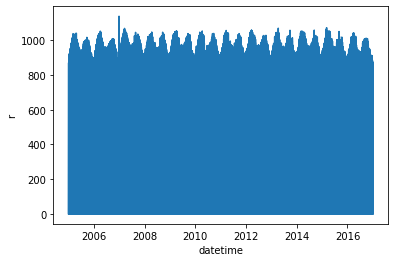

In [11]:
plt.xlabel("datetime")
plt.ylabel("r")
plt.plot(indexedDataset)

In [12]:
rolmean = indexedDataset.rolling(window=365*24).mean()

rolstd = indexedDataset.rolling(window=365*24).std()
print(rolmean,rolstd)

                           G(i)
datetime                       
2005-01-01 00:00:00         NaN
2005-01-01 01:00:00         NaN
2005-01-01 02:00:00         NaN
2005-01-01 03:00:00         NaN
2005-01-01 04:00:00         NaN
...                         ...
2016-12-31 18:00:00  254.750204
2016-12-31 19:00:00  254.750204
2016-12-31 20:00:00  254.750204
2016-12-31 21:00:00  254.750204
2016-12-31 22:00:00  254.750204

[105191 rows x 1 columns]                            G(i)
datetime                       
2005-01-01 00:00:00         NaN
2005-01-01 01:00:00         NaN
2005-01-01 02:00:00         NaN
2005-01-01 03:00:00         NaN
2005-01-01 04:00:00         NaN
...                         ...
2016-12-31 18:00:00  338.999578
2016-12-31 19:00:00  338.999578
2016-12-31 20:00:00  338.999578
2016-12-31 21:00:00  338.999578
2016-12-31 22:00:00  338.999578

[105191 rows x 1 columns]


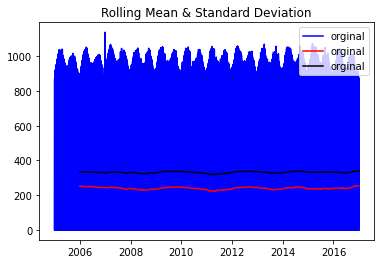

In [13]:
orig = plt.plot(indexedDataset,color='blue', label = 'orginal')
mean = plt.plot(rolmean,color='red', label = 'orginal')
mean = plt.plot(rolstd,color='black', label = 'orginal')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [14]:
pip install patsy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\python3.9.0\python.exe -m pip install --upgrade pip' command.


In [27]:

from statsmodels.tsa.stattools import adfuller

print('Reults of Dickey fuller Test : ')
dftest = adfuller(indexedDataset["G(i)"],autolag='AIC')

dfoutput = pd.Series(dftest[0:5],index=['Test Statistic','p-value','#lags Used', 'Number of Observations Used','Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Reults of Dickey fuller Test : 
Test Statistic                                                        -24.046283
p-value                                                                      0.0
#lags Used                                                                    69
Number of Observations Used                                               105121
Number of Observations used    {'1%': -3.430412208880146, '5%': -2.8615674953...
Critical Value (1%)                                                    -3.430412
Critical Value (5%)                                                    -2.861567
Critical Value (10%)                                                   -2.566785
dtype: object


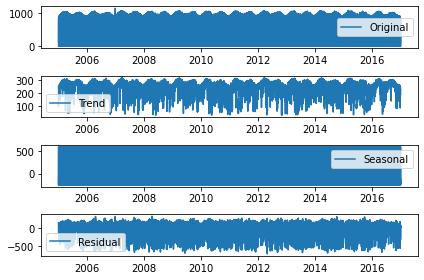

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose


    
decomposition = seasonal_decompose(indexedDataset)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset,label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedData = residual
decomposedData.dropna(inplace=True)

